In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import h5py

In [2]:
plt.rcParams.update({
    "text.usetex":True,
    "font.family":"serif"
})

In [3]:
from tools.misc_tools import RK4_integrator, CDV_time_der, create_data_for_RNN

In [4]:
FTYPE = np.float32
ITYPE = np.int32
from numpy import *

In [5]:
xlabel_kwargs = {'fontsize':15}
ylabel_kwargs = {'fontsize':15}
legend_kwargs = {'fontsize':12}
title_kwargs = {'fontsize':18}

In [6]:
########## Loading Data ##########
data_idx = '005'
dir_name_data = os.getcwd() + '/saved_data/data_' + data_idx

with open(dir_name_data + '/sim_data_params.txt') as f:
    lines = f.readlines()
params_dict = eval(''.join(lines))
params_mat = params_dict['params_mat']
delta_t = params_dict['delta_t']

with np.load(dir_name_data+'/data.npz', allow_pickle=True) as fl:
    all_data = fl['all_data'].astype(FTYPE)[:, 0:6]
    boundary_idx_arr = fl['boundary_idx_arr']
    normalization_constant_arr_ogdata = fl['normalization_constant_arr'][0]
    print([elem for elem in fl.keys()])

    lyapunov_spectrum_mat = fl['lyapunov_spectrum_mat']

print('dir_name_data : ', dir_name_data)
# print('dir_name_pod : ', dir_name_pod)

['all_data', 'boundary_idx_arr', 'normalization_constant_arr', 'initial_t0', 'init_state_org', 'init_state_mat', 'lyapunov_spectrum_mat', 'DKY_lst']
dir_name_data :  /home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_data/data_005


In [7]:
lyapunov_spectrum_mat = np.sort(lyapunov_spectrum_mat, axis=1)
lyapunov_time_arr = lyapunov_spectrum_mat[:, -1]**(-1)
print(lyapunov_time_arr)

[  27.64640338 3275.37171778]


In [8]:
params_mat

array([[ 0.95   , -0.76095,  0.1    ,  1.25   ,  0.2    ,  0.5    ],
       [ 0.99   , -0.79299,  0.1    ,  1.25   ,  0.2    ,  0.5    ]])

In [9]:
print(all_data.shape)
print(boundary_idx_arr)

(400002, 6)
[200001 400002]


In [10]:
all_data = all_data[boundary_idx_arr[0]:]

In [11]:
print(all_data.shape)

(200001, 6)


In [12]:
num_test_idx = 3000

data_mean = np.mean(all_data, axis=0)
data_stddev = np.std(all_data, axis=0)

ACF_arr = np.zeros(shape=num_test_idx)

In [13]:
end_idx = all_data.shape[0] - num_test_idx

for i in range(num_test_idx):
    # ACF_arr[i] = np.mean(np.sum(all_data[0:end_idx]*all_data[i:i+end_idx]), axis=1)
    # ACF_arr[i] = np.mean(
    #     np.sum((all_data[0:end_idx]-data_mean)*(all_data[i:i+end_idx]-data_mean)/data_stddev**2, axis=1))
    ACF_arr[i] = np.mean((all_data[0:end_idx]-data_mean)*(all_data[i:i+end_idx]-data_mean)/data_stddev**2)

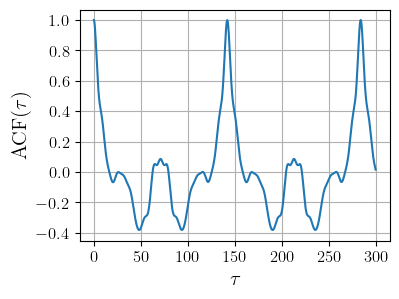

In [34]:
input_time = np.arange(0, num_test_idx)*delta_t

plt.plot(input_time, ACF_arr)

plt.xlabel(r'$\tau$', fontsize=15)
plt.ylabel(r'ACF($\tau$)', fontsize=15)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gcf().set_size_inches(4,3)

plt.savefig(dir_name_data+'/ACF_01.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [29]:
idx = np.where(ACF_arr[10:]>=ACF_arr[10:].max()-1e-3)[0]

In [30]:
print(idx-10)

[1400 2819 2820 2821]
